In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [46]:
root = '/Users/dionysos/workarea/bke'
bdata = root + '/data' + '/emodnet'
out = root + '/data' + '/outs'

filename=out+"/cke_bks_v4_out.nc"
fh=Dataset(filename,mode='r',format="NETCDF4")
#print(fh)
nlats=fh.dimensions['lat'].size
nlons=fh.dimensions['lon'].size

nlons=int(nlons)
nlats=int(nlats)
rlon=np.array(fh["lon"])
rlat=np.array(fh["lat"])
z=np.array(fh["bat"])
z=np.where(z>-5.,0.,z)
bke=np.array(fh["bke_perc"])

In [47]:
fh
#print(np.max(z),np.min(z))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(395), lat(215)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float32 bat(lon, lat), float32 bke_perc(lon, lat), float32 bke_avg(lon, lat), float32 bke_std(lon, lat)
    groups: 

In [48]:
np.shape(z)

(395, 215)

In [49]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

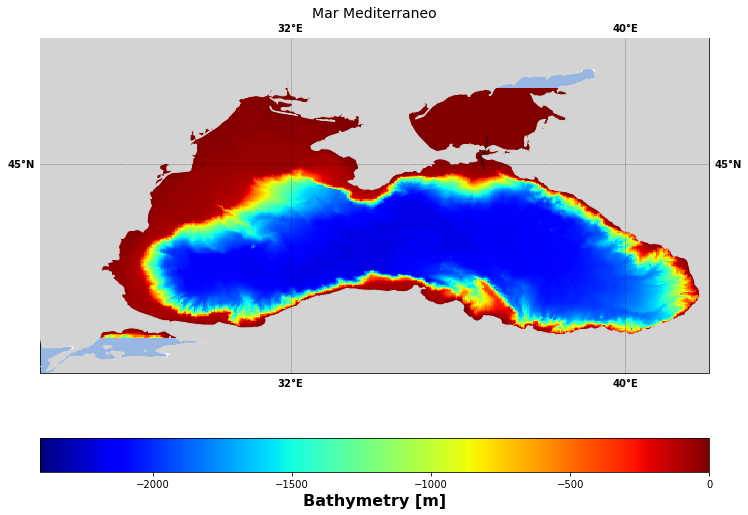

In [54]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12, 8))
ax.set_extent([26, 42, 40, 48], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

c = z
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, c, transform=ccrs.PlateCarree(), cmap='jet')
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,
                    )#ticks=[-2000,-500, -200,-150, 100, -80, -60,-40,-20])

plt.title('Mar Mediterraneo' , fontsize=14)
cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/bat_med.jpg'
plt.savefig(lab, dpi=120)


In [51]:
print(rlat[60],rlon[550],rlon[550])
print(3.5-1./24,3.5+1./24)
print(3.5010-1./480,3.5010-1./480)
#plt.plot(c[180:1980,180])
#plt.plot(c[972:975,90])
#plt.plot(c[960:990,100])
plt.plot(c[550,234:237])


IndexError: index 550 is out of bounds for axis 0 with size 395

In [40]:
lats,lons= np.meshgrid(rlat,rlon)

proj = ccrs.PlateCarree()

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor=cfeature.COLORS['land'])
#coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lines',
    scale='50m', facecolor='none')

/var/folders/t1/1wtfr03x60d3gjgyjq8xv2840000gn/T/ipykernel_4132/1985944222.py:24: RuntimeWarning: divide by zero encountered in log
  cc=np.where(bke<=0.00001,.00001,np.log(bke))


5.0E-02
2.7E+00
5.5E+01


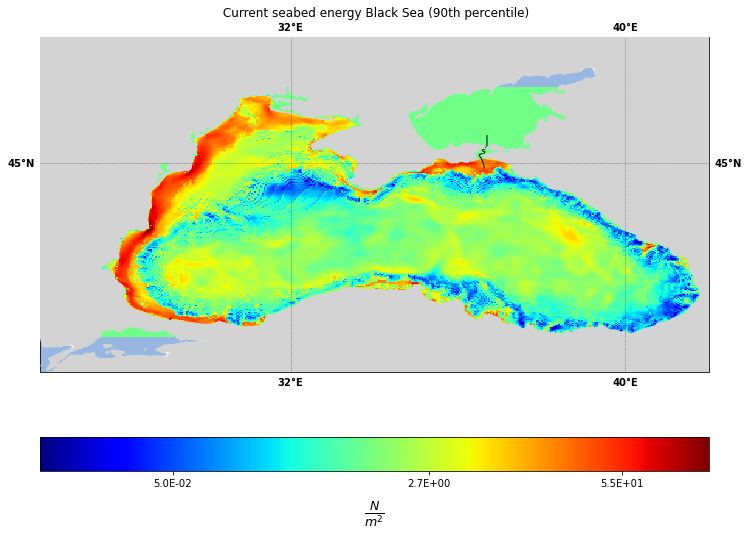

In [56]:
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(12, 8))
ax.set_extent([26, 42, 40, 48], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color='lightgray', edgecolor='black', zorder=17)
ax.add_feature(cfeature.LAKES, alpha=0.9)
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(ocean_50m, zorder=1)
  # cfeature.COASTLINE, zorder=10)
#  ax.add_feature(coastline_50m, edgecolor='black', zorder=16)
ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--', draw_labels=True, zorder=18)
gl.tpop_xlabels = False
gl.left_ylabels = True
gl.right_ylabels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-6,0, 8, 16, 24, 32, 40])
gl.ylocator = mticker.FixedLocator([28,30, 35, 40, 45, 48])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}

bke=np.where(np.isnan(bke),0.,bke)
cc=np.where(bke<=0.00001,.00001,np.log(bke))
#cc = np.log(bke+0.0001)
cc_min = np.min(cc)
cc_max = np.max(cc)
#print(np.shape(z),np.shape(lons),np.shape(lats))
cm = plt.pcolormesh(lons, lats, cc, transform=ccrs.PlateCarree(), cmap='jet',vmin=cc_min, vmax=cc_max)
lab=r'$\frac{N}{m^2}$'
#cb = m.colorbar(p,"bottom", ticks=[-4,-2,-0,2,5],size="5%", pad="10%")
cb = fig.colorbar(cm, ax=ax, orientation='horizontal', fraction=0.08, aspect=20,)
cb.set_label(lab, rotation=0)
cb.set_label(lab, fontsize=18, labelpad=10, fontweight='bold' )
#tkk=[-4,-2,-0,2,5]
tkk=[-3,1,4]
ltk=np.exp(tkk)
stk=[]
for ff in ltk:
    print ('%5.1E' % ff)
    stk.append( '%5.1E' % ff)
cb.set_ticks(tkk)
cb.ax.set_xticklabels(stk)
plt.title(r' Current seabed energy Black Sea (90th percentile)' )
#plt.title(r' Current seabed energy Mediterranean Sea (mean value)' )              
#plt.title('Mar Mediterraneo' , fontsize=14)
#cb.set_label(r'Bathymetry [m]', rotation=0,weight='bold', fontsize=16)
lab = root + '/bke_BS_perc_v4.jpg'
plt.savefig(lab, dpi=120)
plt.show()  

In [24]:
print(cc_min,cc_max)

nan nan
